# Pràctica 7: Clustering


## Introducció

És difícil de valorar si el clustering és "correcte" o si existeix un patró subjacent a les dades que permeti objectivament decidir el grau de certesa de l'agrupació. Pot ser útil per analizar, agrupar i treure informació de com són les dades, però la qualitat de la partició dependrá de l'aplicació i del analista.

S'acostuma a aplicar a dades de forma no supervisada, és a dir, quan no es tenen etiquetes anotades. En aquest cas, no es rep cap feeback d'error o de recompensa en el cas de fer-ho bé. L'aprenentatge no supervisat conté aquells algoritmes que aprenen sense exemple etiquetats, utilitzant les caracteristiques de les entreades per categoritzar of extreure informació segons algún tipus de criteri **geometric** o **estadistic**.

Els diferents tipus de problemes no supervisats, podriem veure'ls a continuació (no són els únics):

+ *Clustering:* dividir els exemples en diferents agrupacions.
+ *Dimensionality reduction:* reduir els atributs/caracteristiques de les dades (principal component analysis, independent component analysis, non-negative matrix factorization.)
+ *Outlier detection:* trobar events inusuals (per exemple, errors, mals funcionaments..).
+ *Novelty detection:* trobar canvis en les dades.

Un dels més utilitzats és el clustering.



## Clustering

El que volem fer és particionar els exemples no etiquetats en conjunts de clusters, de tal manera que:
- Els exemples dins d'un cluster siguin similars (*alta intra-class* similitut)
- Els exemples de diferents clusters siguin diferents (*baixa inter-class* similitut)

Possibles preguntes que ens agradaria poder respondre sobre el clustering.

+ Que és un  *agrupament natural* en les dades específiques a tractar? 
    + Definició d'"agrupabilitat"  (groupness)
    + Definició de  "similaritat/distancia"

+ *Com agrupar* mostres?


+ *Quants* clusters?
    + Fixats a priori?
    + Completament *data driven*?
    + Evitar clusters “trivials” - massa grans o petits ...
    + Quins mètodes funcionen millor quan el numero de mostres és molt gran?
    + Quins mètodes funcionen millor quan el numerop de classes és molt gran?, etc.


+ *Que* és un *bon agrupament*? 
    + Quines mesures objectives es poden usar per avaluar la clualitat dels clusters?


+ En quin espai es millor *agrupar*? 
    + Que fer en un espai de característiques d´alta dimensionalitat?



## Datasets

#### A. Toy Data

Farem ús de diferents generadors d'exemples, per tal de veure els resultats dels diferents algorismes:
- sklearn.datasets.make_blobs
- sklearn.datasets.make_moons
- sklearn.datasets.make_circles


#### B. Fashion MNIST
Us podeu *descarregar* la Fashion MNIST (si es que no la teniu) del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.

#### C. Color Quantization Image

Podeu escollir 2 imatges que volgueu vosaltres.


## A. Toy Data 

#### Preguntes

1. Crea els teus datasets de joguina. En total en tindreu 4 d'independents, que fareu servir a la resta del apartat. Creeu entre 2-7 clusters per la distribució de blobs, modifiqueu el noise. Feu ús de les següents funcions:
 - [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
 - [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
 - [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
 - un dataset on hi hagi dades aleatoriament per tot l'espai (ja fet)
 
 &emsp; &emsp;**Mostreu** els 4 datasets de joguina creats en una mateixa figura fent servir subplots.


2. Feu una comparativa dels resultats obtinguts amb diferents clusteritzadors. Com està explicat a teoria, n'hi ha de molts tipus:

  <img src="https://static-01.hindawi.com/articles/jat/volume-2019/1628417/figures/1628417.fig.001.svgz" width="600">

&emsp; &emsp;  Feu proves sobre els 4 datasets anteriors amb els [següents metodes](https://scikit-learn.org/stable/modules/clustering.html):
 - [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
 - [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
 - [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
 - [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) (single, complete, Ward i average linkage)
 - [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
 - [Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
 
 
  &emsp; &emsp; Intenteu optimitzar una bona visualització per cada una amb els parametres utilitzats. L'objectiu es mostrar els resultats en una mateixa gràfica, com en aquest [exemple](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). <u>Mostreu exemples que demostrin que enteneu què fan els parametres dels diferents algoritmes</u>.


3. Utilitza els seguents mètodes per intentar **seleccionar el número de clusters òptims** per a k-means
 - [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) [(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)
 - [Elbow Method](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6)
[(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

&emsp; &emsp; Com ho extendrieu per a qualsevol mètode amb número de cluster prefixat?




### Respostes

### 1. Toy datasets

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

def plot_data(X, y, Xtest=None, ytest=None):
    if X is None or y is None:
        return
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')
    lim = plt.axis()
    if Xtest is not None:
        plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=20, cmap='Accent', alpha=0.3)
        plt.axis(lim)

def get_data(tipus_dades, n=1000, noise=0.01, rs=0):
    X, y = None, None
    if tipus_dades == "blob":
        pass
    elif tipus_dades == "moons":
        pass
    elif tipus_dades == "circles":
        pass
    elif tipus_dades == "combined":
        pass
    elif tipus_dades == "full":
        rng = np.random.RandomState(rs)
        X = rng.rand(n, 2)
        y = np.ones((X.shape[0]))*-1
        X = sklearn.preprocessing.MinMaxScaler((-1, 2)).fit_transform(X)
    else:
        raise "Toy data not recognized"

    return X, y

(1000, 2)


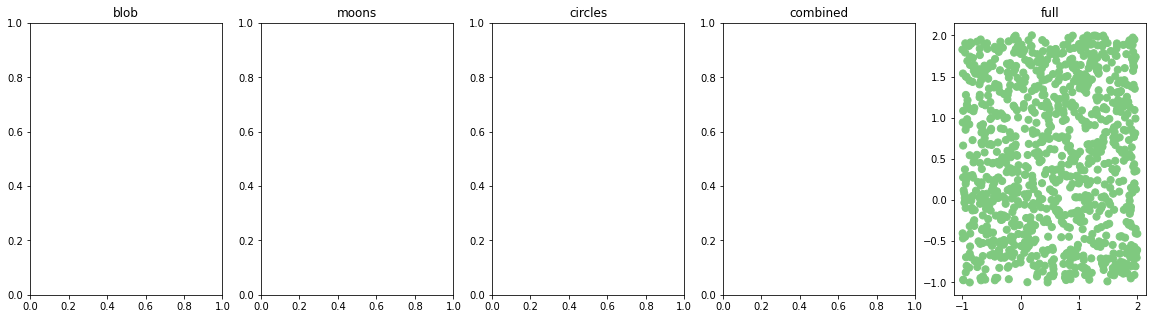

In [2]:
datasets = ['blob', 'moons','circles', 'combined', 'full']

plt.figure(figsize=(20,len(datasets)))
for i,d in enumerate(datasets):
    plt.subplot(1, len(datasets), i+1)
    plt.title(f"{d}")
    X,y = get_data(d)
    plot_data(X, y)

        
print(X.shape)

### 2. Comparar Models

In [3]:
from sklearn.cluster import KMeans

models =[KMeans(n_clusters=2)]

Running experiment: full KMeans


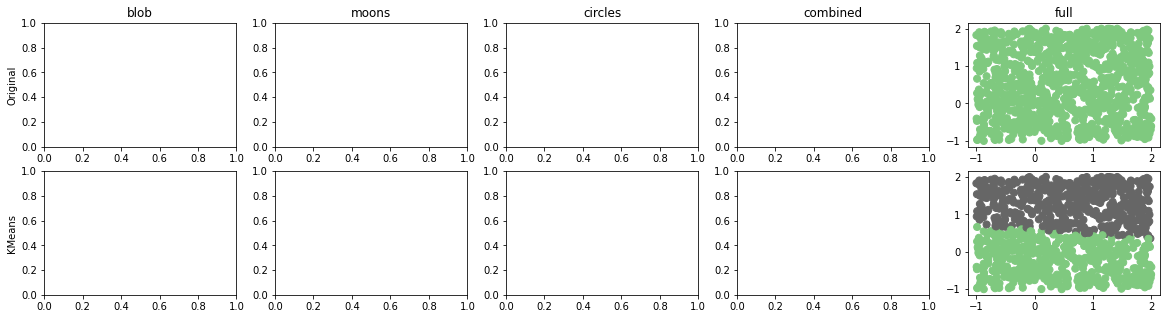

In [4]:
from sklearn.cluster import KMeans

models =[KMeans(n_clusters=2)]

fig, axes = plt.subplots(nrows=1+len(models), ncols=len(datasets), figsize=(20,len(datasets)))
#for ax, d in zip(axes[0], datasets):
#    ax.set_title(d)

axes[0,0].set_ylabel('Original')
for ax, m in zip(axes[1:,0], models):
    ax.set_ylabel(type(m.__class__()).__name__)

for i,d in enumerate(datasets):
    plt.subplot(1+len(models), len(datasets), i+1)
    plt.title(f"{d}")
    X,y = get_data(d)
    plot_data(X, y)
    for j,m in enumerate(models):
        if X is not None:
            print(f"Running experiment: {d} {type(m.__class__()).__name__}")
            m.fit(X)
            plt.subplot(1+len(models), len(datasets), i+1+len(datasets)*(j+1))
            plot_data(X, m.labels_)
        


### 3. Avaluar models

## B. Fashion MNIST

En aquest apartat, farem servir una bases de dades de imatges, per a fer-hi un clustering. Esta anotada manualment per a fer una classificació, pero no utilitzarem aquesta informació per clusteritzar o trobar-ne el número de clusters desitjats. Us deixo un parell de funcions per mostrar gràficament els clusters obtinguts. Link al dataset [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv).

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_mnist_clusters(clusters, cmap='binary'):
    
    n_clusters = clusters.shape[0]
    
    nx = int(np.ceil(np.sqrt(n_clusters)))
    ny = int(np.ceil(n_clusters / nx))

    plt.figure(figsize=(20,10))
    
    for i in range(n_clusters):
        plt.subplot(nx,ny,i+1)
        plt.imshow(clusters[i,:].reshape(28,28), cmap=cmap)
        plt.axis('off')
    
    plt.show()
    
import seaborn as sns

def mostrar_tsne(X_embedded, true_labels, cluster_labels):
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=true_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('viridis', n_colors=len(np.unique(true_labels))))
    plt.title("True Label")

    plt.subplot(122)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=cluster_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('magma', n_colors=len(np.unique(cluster_labels))))
    plt.title("Clusters")
    
def reordena_clusters_segons_y(y, cluster_centers_, cluster_labels):

    n_clusters = cluster_centers_.shape[0]
    cluster_to_y = []
    for i in range(n_clusters):
        cluster_to_y.append(np.argmax(np.bincount(y[cluster_labels == i])))

    idx_clusters = np.argsort(cluster_to_y)
    reordered_cluster_centers = cluster_centers_[idx_clusters]

    reordered_labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        reordered_labels[cluster_labels==idx_clusters[i]] = i

    return reordered_cluster_centers, reordered_labels


#### Preguntes

1. Un cop carregades les dades del fashion-mnist-train, feu un sampling de les dades si us triga massa (agafeu com unes 1000 mostres i guardeu-ho separat del original).

2. Feu una clusterització de les dades. A través del mètode [**Elbow**](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) busqueu la millor K en el K-Means.

3. Executa **k-Means** amb el millor k trobat. Fes-ho amb les dades samplejades i sense samplejar (pot trigar maxim 5 min).

4. Mostra els centres del k-Means trobats. Us he deixat la funcion `visualize_mnist_clusters`. Què representen els centres? Quina diferencia hi trobes amb les dades samplejades i sense samplejar? Per tal de facilitar la comparació, us he deixat la funció `reordena_clusters_segons_y` que reordena l'etiqueta dels labels segons la y real. 

5. Aplica una transformació [`TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) sobre el conjunt de dades (millor el samplejat, sino pot trigar força..) i visualitza els labels en aquest espai de poques dimensions. També us he deixat la funció `mostrar_tsne`, pero podeu fer la vostra propia. Veureu que el sampling utilitzat influeix força amb la visualització.


### C. Color Quantization Image

### Preguntes

1. Escull 2 imatges, propies o de internet, mostreu-les i visualitzeu els colors en una gràfica 3d. A continuació veureu un exemple del que volem (a i b):

<table>
<tr>
    <td>
        <img src="https://miro.medium.com/max/1400/1*je8F8y5Vr9Mg44WEAG0YCg.jpeg" width="300">
    </td>
    <td>
        <img src="https://miro.medium.com/max/2892/1*94LY1FnsLN4L33dho9ol-A.png" style="width: 300px; height:200px;">
    </td>
    <td>
        <img src="https://miro.medium.com/max/1400/1*TIhj90vgn0lzgv6MsT7HNw.png" style="width: 300px; height:200px;">
    </td>
    
</tr>
<tr>
    <td style="text-align:center">
        (a) imatge original
    </td>
    <td style="text-align:center">
        (b) representació de tots els colors de la imatge
    </td>
    <td style="text-align:center">
        (c) quantització dels colors
    </td>
    
</tr>
</table>

2. Realitzeu el clustering de colors, per tal de coneixer aquells "colors" més representatius de la imatge. Podeu aplicar un **k-Means** amb 16 clusters. Mostreu la representació dels colors quantitzats (com la c). Podeu agilitzar el procés fent un sampling del total de pixel de la imatge.

3. Mostreu la comparativa de la imatge original i la imatge representada només amb els 16 colors. [Aqui trobareu un exemple similar](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html). Un exemple amb diferents seleccions de k:
    <img src="https://miro.medium.com/max/1400/1*7ioAN_1cNsDRC76HGBZEyQ.png" width="100%">

4. Realitzeu el clustering de colors aplicant **GMM**. Mostreu la distribució de colors ara amb els clusters de GMM. Quines diferencies hi veieu respecte als clusters obtinguts amb k-Means?

5. Mostra les imatges resultants (original, kmeans i gmm)

In [8]:
import time
import numpy as np
import skimage.io
from sklearn.utils import shuffle
from skimage.transform import downscale_local_mean
from sklearn.cluster import KMeans
%matplotlib widget
import matplotlib.pyplot as plt
    
def llegir_imatge(image_name):
    img = skimage.io.imread(image_name)
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    img = np.array(img, dtype=np.float64) / 255
    return img

def mostra_imatge(img):
    plt.axis('off')
    plt.imshow(img)
    
def mostra_distribucio_colors(img, pixel_colors=None):
    un_de_cada=3
    img = img.reshape(-1,3)
    img = img[::un_de_cada,:]
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(img[:,0], img[:,1], img[:,2], facecolors=img, marker="o")
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title('All Distinct Colors ({} colors)'.format(len(np.unique(img, axis=0))))
    
    if pixel_colors is not None:
        pixel_colors = pixel_colors[::un_de_cada,:]
        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(img[:,0], img[:,1], img[:,2], facecolors=pixel_colors, marker="o")
        ax.set_xlabel("Red")
        ax.set_ylabel("Green")
        ax.set_zlabel("Blue")
        ax.set_title('Clustered Distinct Colors ({} colors)'.format(len(np.unique(pixel_colors, axis=0))))

    plt.show()
    
def samplejar_colors_imatge(img):
    image_array = img.reshape(-1, 3)
    image_array_sample = shuffle(image_array, random_state=0)[:10000]
    return image_array, image_array_sample

def recrear_colors(codebook, labels, shape=None):
    colors_array = np.zeros((len(labels), 3))
    for l in np.unique(labels):
        colors_array[labels==l] = codebook[l,:]

    return colors_array if shape is None else colors_array.reshape(shape)



In [9]:
import matplotlib.backends.backend_webagg_core

In [10]:
img = llegir_imatge("photo1.jpg") # photo2...

In [11]:
def processa_imatge(img, model):
    clusters = None
    labels = None
    t0 = time.time()
    print("Fitting model {} on a small sub-sample of the data".format(model))
    # fer sampling imatge per no trigar gaire..
    X=img.reshape((-1,3))
    X2=X[::10,:]
    
    # fit del model

    # prediccio del model sobre tots els pixels de la imatge (omplir variable labels)
    
    # agafar els clusters segons si es k-means o gmm (estan en atributs diferents)
    
    print("done in %0.3fs." % (time.time() - t0))
        
    return clusters, labels

In [12]:
n_colors = 16
model = None
clusters, labels = processa_imatge(img, model)

Fitting model None on a small sub-sample of the data
done in 0.000s.
